In [1]:
import numpy as np
import pandas as pd
from cosmological_weight import CosmologicalWeight
import matplotlib.pyplot as plt
plt.style.use("plots/mesa.mplstyle")

In [2]:
# SFR model parameter
SFR = 'Illustris'

In [3]:
# load BBHs from a hybrid POSYDON pop synth (CE/SMT cosmic+MESA, CHE MESA) see arXiv:2106.15841
df_CE = pd.read_csv('./datasets/arXiv_2106.15841_CE_alpha_0.5.csv.gz', compression='gzip')
df_SMT = pd.read_csv('./datasets/arXiv_2106.15841_SMT.csv.gz', compression='gzip')
df_CHE = pd.read_csv('./datasets/arXiv_2106.15841_CHE.csv.gz', compression='gzip')

In [4]:
#### underlying BBH population (infinite sensitivity)

# CE channel
# match df.columns to class_variables
class_variables = ['totalMassEvolvedForZ', 'channel', 'optimistic', 'metallicity', 'm_BH1', 'm_star2_postCE', 'm_BH2',
                 'spin_BH1', 'spin_BH2', 'm_disk_rad', 'max_he_mass_ejected', 'p_postCE', 'p_f', 'e_f', 
                   'tilt_BH2', 'Dt_binary', 'Dt_inspiral']
pop_CE = CosmologicalWeight(df_CE, columns=df_CE.columns.tolist(), class_variables=class_variables, SFR=SFR)

sensitivity = 'infinite'
pop_CE.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_CE_inf, z_formation_CE_inf, z_merger_CE_inf, s_i_CE_inf = pop_CE.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_CE.getRedshiftBinCenter()
R_CE_inf= pop_CE.RateDensity(s_i_CE_inf, z_merger_CE_inf, Type='BBHs', sensitivity='infinite')
print('CE: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_CE_inf[0],2), 'Gpc^-3 yr^-1')

# SMT channnel
pop_SMT = CosmologicalWeight(df_SMT, columns=df_SMT.columns.tolist(), class_variables=class_variables, SFR=SFR)

sensitivity = 'infinite'
pop_SMT.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_SMT_inf, z_formation_SMT_inf, z_merger_SMT_inf, s_i_SMT_inf = pop_SMT.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_SMT.getRedshiftBinCenter()
R_SMT_inf= pop_SMT.RateDensity(s_i_SMT_inf, z_merger_SMT_inf, Type='BBHs', sensitivity='infinite')
print('SMT: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_SMT_inf[0],2), 'Gpc^-3 yr^-1')

# CHE channel
# match df.columns to class_variables
class_variables = ['totalMassEvolvedForZ', 'metallicity', 'm_star1_i', 'q_i', 'm_BH1',
                    'm_disk_rad', 'p_i', 'p_f', 'spin_BH1',
                    'Dt_binary', 'Dt_inspiral', 'e_f', 'max_he_mass_ejected', 'm_BH2','spin_BH2']
pop_CHE = CosmologicalWeight(df_CHE, columns=df_CHE.columns.tolist(), class_variables=class_variables, SFR=SFR)

sensitivity = 'infinite'
pop_CHE.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_CHE_inf, z_formation_CHE_inf, z_merger_CHE_inf, s_i_CHE_inf = pop_CHE.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_CHE.getRedshiftBinCenter()
R_CHE_inf= pop_CHE.RateDensity(s_i_CHE_inf, z_merger_CHE_inf, Type='BBHs', sensitivity='infinite')
print('CHE: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_CHE_inf[0],2), 'Gpc^-3 yr^-1')

# compute chi_eff and m_chirp
chi_eff_CE_inf = pop_CE.getData('chi_eff',index_CE_inf)
m_chirp_CE_inf = pop_CE.getData('Mchirp',index_CE_inf)
chi_eff_SMT_inf = pop_SMT.getData('chi_eff',index_SMT_inf)
m_chirp_SMT_inf = pop_SMT.getData('Mchirp',index_SMT_inf)
chi_eff_CHE_inf = pop_CHE.getData('chi_eff',index_CHE_inf)
m_chirp_CHE_inf = pop_CHE.getData('Mchirp',index_CHE_inf)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [02:37<00:00,  1.14s/it]


CE: BBH merger rate density in the local Universe (z~0.00): 11.21 Gpc^-3 yr^-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [01:19<00:00,  1.73it/s]


SMT: BBH merger rate density in the local Universe (z~0.00): 22.14 Gpc^-3 yr^-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:07<00:00, 19.24it/s]


CHE: BBH merger rate density in the local Universe (z~0.00): 5.26 Gpc^-3 yr^-1


In [5]:
#### LIGO-Virgo O3 sensitivity detectable BBH population
# GW detector model selection accounts for z_merger, BH masses and spins see arXiv:2106.15841

def chi_eff(m_1, m_2, a_1, a_2, tilt_1, tilt_2):
    return (m_1*a_1*np.cos(tilt_1)+m_2*a_2*np.cos(tilt_2))/(m_1+m_2)

def m_chirp(m_1, m_2):
    return (m_1*m_2)**(3./5)/(m_1+m_2)**(1./5)

# load datasets with pdet computed with XXXX & compute effective spin parameter and chirp mass
path = '/Users/simone/OneDrive - unige.ch/PhD/Bavera+22a-GRBs/GRB_project/model_selection/midhighlatelow/'
data_CE = pd.read_csv(path+"CE_alpha_0.5_three_detectors.gz", compression='gzip') 
weights_CE_O3 = data_CE['weights']*data_CE['midhighlatelow_network']
chi_eff_CE_O3 = chi_eff(data_CE['m_BH1'], data_CE['m_BH2'], data_CE['a_1'], data_CE['a_2'],  data_CE['tilt_1'],  data_CE['tilt_1'])
m_chirp_CE_O3 = m_chirp(data_CE['m_BH1'], data_CE['m_BH2'])
z_merger_CE_O3 = data_CE['z_merger']

data_SMT = pd.read_csv(path+"SMT_alpha_0.5_three_detectors.gz", compression='gzip') 
weights_SMT_O3 = data_SMT['weights']*data_SMT['midhighlatelow_network']
chi_eff_SMT_O3 = chi_eff(data_SMT['m_BH1'], data_SMT['m_BH2'], data_SMT['a_1'], data_SMT['a_2'],  data_SMT['tilt_1'],  data_SMT['tilt_1'])
m_chirp_SMT_O3 = m_chirp(data_SMT['m_BH1'], data_SMT['m_BH2'])
z_merger_SMT_O3 = data_SMT['z_merger']

data_CHE = pd.read_csv(path+"CHE_three_detectors.gz", compression='gzip') 
weights_CHE_O3 = data_CHE['weights']*data_CHE['midhighlatelow_network']
chi_eff_CHE_O3 = chi_eff(data_CHE['m_BH1'], data_CHE['m_BH2'], data_CHE['a_1'], data_CHE['a_2'],  data_CHE['tilt_1'],  data_CHE['tilt_2'])
m_chirp_CHE_O3 = m_chirp(data_CHE['m_BH1'], data_CHE['m_BH2'])
z_merger_CHE_O3 = data_CHE['z_merger']

In [6]:
#### Einstein Telescope sensitivity detectable BBH population

# CE channel
# match df.columns to class_variables
sensitivity = 'ET'
pop_CE.RunBBHsSimulation(sensitivity, flag_pdet=True, path_to_dir='../')
index_CE_ET, z_formation_CE_ET, z_merger_CE_ET, s_i_CE_ET = pop_CE.loadBBHsSimulation(sensitivity, path_to_dir='../')

# SMT channnel
sensitivity = 'ET'
pop_SMT.RunBBHsSimulation(sensitivity, flag_pdet=True, path_to_dir='../')
index_SMT_ET, z_formation_SMT_ET, z_merger_SMT_ET, s_i_SMT_ET = pop_SMT.loadBBHsSimulation(sensitivity, path_to_dir='../')

# CHE channel
sensitivity = 'ET'
pop_CHE.RunBBHsSimulation(sensitivity, flag_pdet=True, path_to_dir='../')
index_CHE_ET, z_formation_CHE_ET, z_merger_CHE_ET, s_i_CHE_ET = pop_CHE.loadBBHsSimulation(sensitivity, path_to_dir='../')

# compute chi_eff and m_chirp
chi_eff_CE_ET = pop_CE.getData('chi_eff',index_CE_ET)
m_chirp_CE_ET = pop_CE.getData('Mchirp',index_CE_ET)
chi_eff_SMT_ET = pop_SMT.getData('chi_eff',index_SMT_ET)
m_chirp_SMT_ET = pop_SMT.getData('Mchirp',index_SMT_ET)
chi_eff_CHE_ET = pop_CHE.getData('chi_eff',index_CHE_ET)
m_chirp_CHE_ET = pop_CHE.getData('Mchirp',index_CHE_ET)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:13<00:00, 10.27it/s]


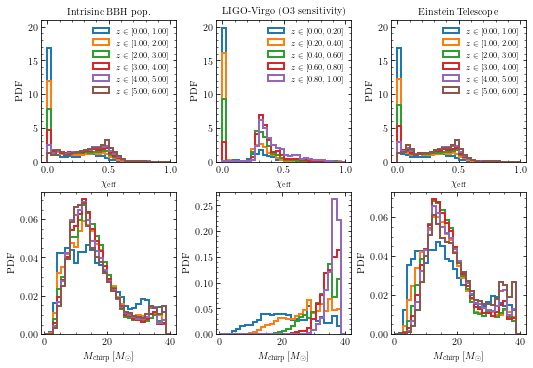

In [7]:
plt.figure(figsize=(7.5, 5))

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

plt.tight_layout(pad=1.5)

for z in [0.5,1.5,2.5,3.5,4.5,5.5]:
    
    delta = 0.5
    z_CE = np.logical_and(z_merger_CE_inf>=z-delta,z_merger_CE_inf<z+delta)
    mask_CE = np.logical_and(np.invert(np.isnan(chi_eff_CE_inf)),z_CE)
    z_SMT = np.logical_and(z_merger_SMT_inf>=z-delta,z_merger_SMT_inf<z+delta)
    mask_SMT = np.logical_and(np.invert(np.isnan(chi_eff_SMT_inf)),z_SMT)
    z_CHE = np.logical_and(z_merger_CHE_inf>=z-delta,z_merger_CHE_inf<z+delta)
    mask_CHE = np.logical_and(np.invert(np.isnan(chi_eff_CHE_inf)),z_CHE)
    chi_eff = np.concatenate((chi_eff_CE_inf[mask_CE],chi_eff_SMT_inf[mask_SMT],chi_eff_CHE_inf[mask_CHE]))
    m_chirp = np.concatenate((m_chirp_CE_inf[mask_CE],m_chirp_SMT_inf[mask_SMT],m_chirp_CHE_inf[mask_CHE]))
    weight = np.concatenate((s_i_CE_inf[mask_CE],s_i_SMT_inf[mask_SMT],s_i_CHE_inf[mask_CHE]))
    
    ax1.hist(chi_eff, weights=weight, label='$z \in [%1.2f,%1.2f]$'%(z-delta,z+delta), linewidth=2, bins=30, density=True, histtype=u'step', range=(0.0,1.0))
    ax4.hist(m_chirp, weights=weight, label='$z \in [%1.2f,%1.2f]$'%(z-delta,z+delta), linewidth=2, bins=30, density=True, histtype=u'step', range=(0.0,40.0))

for z in [0.1,0.3,0.5,0.7,0.9]:
    
    delta = 0.1
    z_CE = np.logical_and(z_merger_CE_O3>=z-delta,z_merger_CE_O3<z+delta)
    mask_CE = np.logical_and(np.invert(np.isnan(chi_eff_CE_O3)),z_CE)
    z_SMT = np.logical_and(z_merger_SMT_O3>=z-delta,z_merger_SMT_O3<z+delta)
    mask_SMT = np.logical_and(np.invert(np.isnan(chi_eff_SMT_O3)),z_SMT)
    z_CHE = np.logical_and(z_merger_CHE_O3>=z-delta,z_merger_CHE_O3<z+delta)
    mask_CHE = np.logical_and(np.invert(np.isnan(chi_eff_CHE_O3)),z_CHE)
    chi_eff = np.concatenate((chi_eff_CE_O3[mask_CE],chi_eff_SMT_O3[mask_SMT],chi_eff_CHE_O3[mask_CHE]))
    m_chirp = np.concatenate((m_chirp_CE_O3[mask_CE],m_chirp_SMT_O3[mask_SMT],m_chirp_CHE_O3[mask_CHE]))
    weight = np.concatenate((weights_CE_O3[mask_CE],weights_SMT_O3[mask_SMT],weights_CHE_O3[mask_CHE]))
    
    ax2.hist(chi_eff, weights=weight, label='$z \in [%1.2f,%1.2f]$'%(z-delta,z+delta), linewidth=2, bins=30, density=True, histtype=u'step', range=(0.0,1.0))
    ax5.hist(m_chirp, weights=weight, label='$z \in [%1.2f,%1.2f]$'%(z-delta,z+delta), linewidth=2, bins=30, density=True, histtype=u'step', range=(0.0,40.0))

for z in [0.5,1.5,2.5,3.5,4.5,5.5]:
    
    delta = 0.5
    z_CE = np.logical_and(z_merger_CE_ET>=z-delta,z_merger_CE_ET<z+delta)
    mask_CE = np.logical_and(np.invert(np.isnan(chi_eff_CE_ET)),z_CE)
    z_SMT = np.logical_and(z_merger_SMT_ET>=z-delta,z_merger_SMT_ET<z+delta)
    mask_SMT = np.logical_and(np.invert(np.isnan(chi_eff_SMT_ET)),z_SMT)
    z_CHE = np.logical_and(z_merger_CHE_ET>=z-delta,z_merger_CHE_ET<z+delta)
    mask_CHE = np.logical_and(np.invert(np.isnan(chi_eff_CHE_ET)),z_CHE)
    chi_eff = np.concatenate((chi_eff_CE_ET[mask_CE],chi_eff_SMT_ET[mask_SMT],chi_eff_CHE_ET[mask_CHE]))
    m_chirp = np.concatenate((m_chirp_CE_ET[mask_CE],m_chirp_SMT_ET[mask_SMT],m_chirp_CHE_ET[mask_CHE]))
    weight = np.concatenate((s_i_CE_ET[mask_CE],s_i_SMT_ET[mask_SMT],s_i_CHE_ET[mask_CHE]))
    
    ax3.hist(chi_eff, weights=weight, label='$z \in [%1.2f,%1.2f]$'%(z-delta,z+delta), linewidth=2, bins=30, density=True, histtype=u'step', range=(0.0,1.0))
    ax6.hist(m_chirp, weights=weight, label='$z \in [%1.2f,%1.2f]$'%(z-delta,z+delta), linewidth=2, bins=30, density=True, histtype=u'step', range=(0.0,40.0))

ax1.set_title('Intrisinc BBH pop.')
ax2.set_title('LIGO-Virgo (O3 sensitivity)')
ax3.set_title('Einstein Telescope')
ax1.legend(loc=1)
ax2.legend(loc=1)
ax3.legend(loc=1)
ax1.set_ylabel('PDF')
ax2.set_ylabel('PDF')
ax3.set_ylabel('PDF')
ax4.set_ylabel('PDF')
ax5.set_ylabel('PDF')
ax6.set_ylabel('PDF')
ax1.set_ylim(0.,21)
ax2.set_ylim(0.,21)
ax3.set_ylim(0.,21)
ax1.set_xlim(-0.05,1.05)
ax2.set_xlim(-0.05,1.05)
ax3.set_xlim(-0.05,1.05)
ax4.set_xlim(-1.,42)
ax5.set_xlim(-1.,42)
ax6.set_xlim(-1.,42)
ax1.set_xlabel(r'$\chi_\mathrm{eff}$')
ax2.set_xlabel(r'$\chi_\mathrm{eff}$')
ax3.set_xlabel(r'$\chi_\mathrm{eff}$')
ax4.set_xlabel(r'$M_\mathrm{chirp}\,[M_\odot]$')
ax5.set_xlabel(r'$M_\mathrm{chirp}\,[M_\odot]$')
ax6.set_xlabel(r'$M_\mathrm{chirp}\,[M_\odot]$')


plt.savefig('./plots/arXiv_220402619_chi_eff_m_chirp_vs_z.pdf',dpi=300,bbox_inches='tight')

In [8]:
# compute f_chi_eff>chi0

# intrisic BBH populationn
f_chi_above_02 = []
f_chi_above_02_CE = []
f_chi_above_02_SMT = []
f_chi_above_02_CHE = []
f_chi_above_05 = []
f_chi_above_05_CE = []
f_chi_above_05_SMT = []
f_chi_above_05_CHE = []
f_CE = []
f_SMT = []
f_CHE = []
zs = pop_CE.getRedshiftBinEdges()[:-3][::2]
for j, z in enumerate(zs.tolist()):
    
    if j==0:
        continue

    mask_CE = np.logical_and(z_merger_CE_inf>=zs[j-1],z_merger_CE_inf<zs[j])
    mask_SMT = np.logical_and(z_merger_SMT_inf>=zs[j-1],z_merger_SMT_inf<zs[j])
    mask_CHE = np.logical_and(z_merger_CHE_inf>=zs[j-1],z_merger_CHE_inf<zs[j])
    chieff = np.concatenate((chi_eff_CE_inf[mask_CE],chi_eff_SMT_inf[mask_SMT],chi_eff_CHE_inf[mask_CHE]))
    weight = np.concatenate((s_i_CE_inf[mask_CE],s_i_SMT_inf[mask_SMT],s_i_CHE_inf[mask_CHE]))
    
    f_chi_above_02.append(sum(weight[chieff>0.2])/sum(weight))
    f_chi_above_02_CE.append(sum(s_i_CE_inf[mask_CE][chi_eff_CE_inf[mask_CE]>0.2])/sum(s_i_CE_inf[mask_CE]))
    f_chi_above_02_SMT.append(sum(s_i_SMT_inf[mask_SMT][chi_eff_SMT_inf[mask_SMT]>0.2])/sum(s_i_SMT_inf[mask_SMT]))
    f_chi_above_02_CHE.append(sum(s_i_CHE_inf[mask_CHE][chi_eff_CHE_inf[mask_CHE]>0.2])/sum(s_i_CHE_inf[mask_CHE]))
    f_chi_above_05.append(sum(weight[chieff>0.5])/sum(weight))
    f_chi_above_05_CE.append(sum(s_i_CE_inf[mask_CE][chi_eff_CE_inf[mask_CE]>0.5])/sum(s_i_CE_inf[mask_CE]))
    f_chi_above_05_SMT.append(sum(s_i_SMT_inf[mask_SMT][chi_eff_SMT_inf[mask_SMT]>0.5])/sum(s_i_SMT_inf[mask_SMT]))
    f_chi_above_05_CHE.append(sum(s_i_CHE_inf[mask_CHE][chi_eff_CHE_inf[mask_CHE]>0.5])/sum(s_i_CHE_inf[mask_CHE]))
    f_CE.append(sum(s_i_CE_inf[mask_CE])/sum(weight))
    f_SMT.append(sum(s_i_SMT_inf[mask_SMT])/sum(weight))
    f_CHE.append(sum(s_i_CHE_inf[mask_CHE])/sum(weight))

In [9]:
# LIGO-Virgo O3 detectable BBH populationn
f_chi_above_02_O3 = []
f_chi_above_02_CE_O3 = []
f_chi_above_02_SMT_O3 = []
f_chi_above_02_CHE_O3 = []
f_chi_above_05_O3 = []
f_chi_above_05_CE_O3 = []
f_chi_above_05_SMT_O3 = []
f_chi_above_05_CHE_O3 = []
f_CE_O3 = []
f_SMT_O3 = []
f_CHE_O3 = []
zs = pop_CE.getRedshiftBinEdges()[::2][:-29] # \Delta t = 200 Myr
for j, z in enumerate(zs.tolist()):
    
    if j==0:
        continue

    mask_CE = np.logical_and(z_merger_CE_O3>=zs[j-1],z_merger_CE_O3<zs[j])
    mask_SMT = np.logical_and(z_merger_SMT_O3>=zs[j-1],z_merger_SMT_O3<zs[j])
    mask_CHE = np.logical_and(z_merger_CHE_O3>=zs[j-1],z_merger_CHE_O3<zs[j])
    chieff = np.concatenate((chi_eff_CE_O3[mask_CE],chi_eff_SMT_O3[mask_SMT],chi_eff_CHE_O3[mask_CHE]))
    weight = np.concatenate((weights_CE_O3[mask_CE],weights_SMT_O3[mask_SMT],weights_CHE_O3[mask_CHE]))
    
    f_chi_above_02_O3.append(sum(weight[chieff>0.2])/sum(weight) if sum(weight) != 0. else 0.)
    f_chi_above_02_CE_O3.append(sum(weights_CE_O3[mask_CE][chi_eff_CE_O3[mask_CE]>0.2])/sum(weights_CE_O3[mask_CE]) if sum(weights_CE_O3[mask_CE]) != 0. else 0.)
    f_chi_above_02_SMT_O3.append(sum(weights_SMT_O3[mask_SMT][chi_eff_SMT_O3[mask_SMT]>0.2])/sum(weights_SMT_O3[mask_SMT]) if sum(weights_SMT_O3[mask_SMT]) != 0. else 0.)
    f_chi_above_02_CHE_O3.append(sum(weights_CHE_O3[mask_CHE][chi_eff_CHE_O3[mask_CHE]>0.2])/sum(weights_CHE_O3[mask_CHE]) if sum(weights_CHE_O3[mask_CHE]) != 0. else 0.)
    f_chi_above_05_O3.append(sum(weight[chieff>0.5])/sum(weight) if sum(weight) != 0. else 0.)
    f_chi_above_05_CE_O3.append(sum(weights_CE_O3[mask_CE][chi_eff_CE_O3[mask_CE]>0.5])/sum(weights_CE_O3[mask_CE]) if sum(weights_CE_O3[mask_CE]) != 0. else 0.)
    f_chi_above_05_SMT_O3.append(sum(weights_SMT_O3[mask_SMT][chi_eff_SMT_O3[mask_SMT]>0.5])/sum(weights_SMT_O3[mask_SMT]) if sum(weights_SMT_O3[mask_SMT]) != 0. else 0.)
    f_chi_above_05_CHE_O3.append(sum(weights_CHE_O3[mask_CHE][chi_eff_CHE_O3[mask_CHE]>0.5])/sum(weights_CHE_O3[mask_CHE]) if sum(weights_CHE_O3[mask_CHE]) != 0. else 0.)
    f_CE_O3.append(sum(weights_CE_O3[mask_CE])/sum(weight) if sum(weight) != 0. else 0.)
    f_SMT_O3.append(sum(weights_SMT_O3[mask_SMT])/sum(weight) if sum(weight) != 0. else 0.)
    f_CHE_O3.append(sum(weights_CHE_O3[mask_CHE])/sum(weight) if sum(weight) != 0. else 0.)

In [10]:
# Einstein Telescope detectable BBH populationn
f_chi_above_02_ET = []
f_chi_above_02_CE_ET = []
f_chi_above_02_SMT_ET = []
f_chi_above_02_CHE_ET = []
f_chi_above_05_ET = []
f_chi_above_05_CE_ET = []
f_chi_above_05_SMT_ET = []
f_chi_above_05_CHE_ET = []
f_CE_ET = []
f_SMT_ET = []
f_CHE_ET = []
zs = pop_CE.getRedshiftBinEdges()[:-3][::2] # \Delta t = 200 Myr
for j, z in enumerate(zs.tolist()):
    
    if j==0:
        continue

    mask_CE = np.logical_and(z_merger_CE_ET>=zs[j-1],z_merger_CE_ET<zs[j])
    mask_SMT = np.logical_and(z_merger_SMT_ET>=zs[j-1],z_merger_SMT_ET<zs[j])
    mask_CHE = np.logical_and(z_merger_CHE_ET>=zs[j-1],z_merger_CHE_ET<zs[j])
    chieff = np.concatenate((chi_eff_CE_ET[mask_CE],chi_eff_SMT_ET[mask_SMT],chi_eff_CHE_ET[mask_CHE]))
    weight = np.concatenate((s_i_CE_ET[mask_CE],s_i_SMT_ET[mask_SMT],s_i_CHE_ET[mask_CHE]))
    
    f_chi_above_02_ET.append(sum(weight[chieff>0.2])/sum(weight))
    f_chi_above_02_CE_ET.append(sum(s_i_CE_ET[mask_CE][chi_eff_CE_ET[mask_CE]>0.2])/sum(s_i_CE_ET[mask_CE]))
    f_chi_above_02_SMT_ET.append(sum(s_i_SMT_ET[mask_SMT][chi_eff_SMT_ET[mask_SMT]>0.2])/sum(s_i_SMT_ET[mask_SMT]))
    f_chi_above_02_CHE_ET.append(sum(s_i_CHE_ET[mask_CHE][chi_eff_CHE_ET[mask_CHE]>0.2])/sum(s_i_CHE_ET[mask_CHE]))
    f_chi_above_05_ET.append(sum(weight[chieff>0.5])/sum(weight))
    f_chi_above_05_CE_ET.append(sum(s_i_CE_ET[mask_CE][chi_eff_CE_ET[mask_CE]>0.5])/sum(s_i_CE_ET[mask_CE]))
    f_chi_above_05_SMT_ET.append(sum(s_i_SMT_ET[mask_SMT][chi_eff_SMT_ET[mask_SMT]>0.5])/sum(s_i_SMT_ET[mask_SMT]))
    f_chi_above_05_CHE_ET.append(sum(s_i_CHE_ET[mask_CHE][chi_eff_CHE_ET[mask_CHE]>0.5])/sum(s_i_CHE_ET[mask_CHE]))
    f_CE_ET.append(sum(s_i_CE_ET[mask_CE])/sum(weight))
    f_SMT_ET.append(sum(s_i_SMT_ET[mask_SMT])/sum(weight))
    f_CHE_ET.append(sum(s_i_CHE_ET[mask_CHE])/sum(weight))

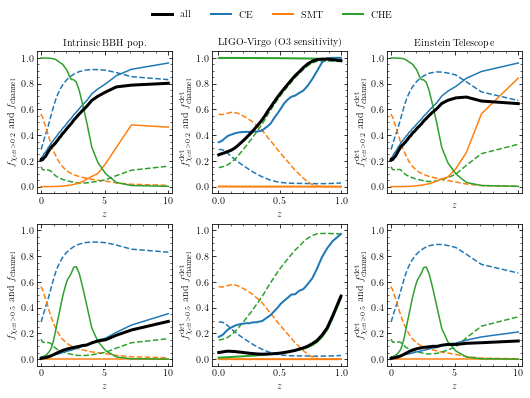

In [11]:
plt.figure(figsize=(7.5, 5))

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

plt.tight_layout(pad=1.5)

ax1.set_title('Intrinsic BBH pop.',fontsize=10,y=1.)

zs_centers = pop_CE.getRedshiftBinCenter()[:-4][::2]
zs_centers[-1] = 10. # the last bin edge is 11.3 let's shift the center z=9 to the plotted boundary 10.

ax1.plot(zs_centers, f_CE, '--', color='tab:blue')
ax1.plot(zs_centers, f_SMT, '--', color='tab:orange')
ax1.plot(zs_centers, f_CHE, '--', color='tab:green')

ax1.plot(zs_centers, f_chi_above_02_CE, color='tab:blue')
ax1.plot(zs_centers, f_chi_above_02_SMT, color='tab:orange')
ax1.plot(zs_centers, f_chi_above_02_CHE, color='tab:green')
ax1.plot(zs_centers, f_chi_above_02, linewidth=3, c='k')

ax1.set_ylabel(r'$f_{\chi_\mathrm{eff}>0.2}$ and $f_\mathrm{channel}$')
ax1.set_xlabel(r'$z$')
ax1.set_ylim(-0.05,1.05)
ax1.set_xlim(-0.3,10.3)
ax1.tick_params(axis='y', right=True, direction='in')
ax1.tick_params(axis='x', bottom=True, direction='in')

ax4.plot(zs_centers, f_CE, '--', color='tab:blue')
ax4.plot(zs_centers, f_SMT, '--', color='tab:orange')
ax4.plot(zs_centers, f_CHE, '--', color='tab:green')

ax4.plot(zs_centers, f_chi_above_05_CE, color='tab:blue')
ax4.plot(zs_centers, f_chi_above_05_SMT, color='tab:orange')
ax4.plot(zs_centers, f_chi_above_05_CHE, color='tab:green')
ax4.plot(zs_centers, f_chi_above_05, linewidth=3, c='k')

ax4.set_xlabel(r'$z$')
ax4.set_ylim(-0.05,1.05)
ax4.set_xlim(-0.3,10.3)
ax4.set_ylabel(r'$f_{\chi_\mathrm{eff}>0.5}$ and $f_\mathrm{channel}$')
ax4.tick_params(axis='y', right=True, direction='in')
ax4.tick_params(axis='x', bottom=True, top=True, direction='in')


ax2.set_title('LIGO-Virgo (O3 sensitivity)',fontsize=10,y=1.)
zs_centers = pop_CE.getRedshiftBinCenter()[::2][:-29]
zs_centers[-1] = 1.  # the last bin edge is 1.01 let's shift the center z=0.98 to the plotted boundary 1.

ax2.plot(zs_centers, f_CE_O3, '--', color='tab:blue')
ax2.plot(zs_centers, f_SMT_O3, '--', color='tab:orange')
ax2.plot(zs_centers, f_CHE_O3, '--', color='tab:green')

ax2.plot(zs_centers, f_chi_above_02_CE_O3, linewidth=2, color='tab:blue')
ax2.plot(zs_centers, f_chi_above_02_SMT_O3, linewidth=2, color='tab:orange')
ax2.plot(zs_centers, f_chi_above_02_CHE_O3, linewidth=2, color='tab:green')
ax2.plot(zs_centers, f_chi_above_02_O3, linewidth=3, c='k')

ax2.set_ylabel(r'$f^\mathrm{det}_{\chi_\mathrm{eff}>0.2}$ and $f^\mathrm{det}_\mathrm{channel}$')
ax2.set_xlabel(r'$z$')
ax2.set_ylim(-0.05,1.05)
ax2.set_xlim(-0.05,1.05)

ax2.tick_params(axis='y', which='both', right=True, direction='in')
ax2.tick_params(axis='x', bottom=True, direction='in')

ax5.plot(zs_centers, f_CE_O3, '--', color='tab:blue')
ax5.plot(zs_centers, f_SMT_O3, '--', color='tab:orange')
ax5.plot(zs_centers, f_CHE_O3, '--', color='tab:green')

l1, = ax5.plot(zs_centers, f_chi_above_05_CE_O3, linewidth=2, color='tab:blue', label='CE')
l2, = ax5.plot(zs_centers, f_chi_above_05_SMT_O3, linewidth=2, color='tab:orange', label='SMT')
l3, = ax5.plot(zs_centers, f_chi_above_05_CHE_O3, linewidth=2, color='tab:green', label='CHE')
l0, = ax5.plot(zs_centers, f_chi_above_05_O3, linewidth=3, c='k', label='all')

ax5.set_xlabel(r'$z$')
ax5.set_ylim(-0.05,1.05)
ax5.set_xlim(-0.05,1.05)
ax5.tick_params(axis='y', right=True, direction='in')
ax5.tick_params(axis='x', bottom=True, top=True, direction='in', labeltop=False)
ax5.set_ylabel(r'$f^\mathrm{det}_{\chi_\mathrm{eff}>0.5}$ and $f^\mathrm{det}_\mathrm{channel}$')


ax3.set_title('Einstein Telescope',fontsize=10,y=1.)

zs_centers = pop_CE.getRedshiftBinCenter()[:-4][::2]
zs_centers[-1] = 10. # the last bin edge is 11.3 let's shift the center z=9 to the plotted boundary 10.

ax3.plot(zs_centers, f_CE_ET, '--', color='tab:blue')
ax3.plot(zs_centers, f_SMT_ET, '--', color='tab:orange')
ax3.plot(zs_centers, f_CHE_ET, '--', color='tab:green')

ax3.plot(zs_centers, f_chi_above_02_CE_ET, color='tab:blue')
ax3.plot(zs_centers, f_chi_above_02_SMT_ET, color='tab:orange')
ax3.plot(zs_centers, f_chi_above_02_CHE_ET, color='tab:green')
ax3.plot(zs_centers, f_chi_above_02_ET, linewidth=3, c='k')

ax3.set_ylabel(r'$f^\mathrm{det}_{\chi_\mathrm{eff}>0.2}$ and $f^\mathrm{det}_\mathrm{channel}$')
ax3.set_xlabel(r'$z$')
ax3.set_ylim(-0.05,1.05)
ax3.set_xlim(-0.3,10.3)
ax3.tick_params(axis='y', right=True, direction='in')
ax3.tick_params(axis='x', bottom=True, direction='in', labelbottom=False)

ax6.plot(zs_centers, f_CE_ET, '--', color='tab:blue')
ax6.plot(zs_centers, f_SMT_ET, '--', color='tab:orange')
ax6.plot(zs_centers, f_CHE_ET, '--', color='tab:green')

ax6.plot(zs_centers, f_chi_above_05_CE_ET, color='tab:blue')
ax6.plot(zs_centers, f_chi_above_05_SMT_ET, color='tab:orange')
ax6.plot(zs_centers, f_chi_above_05_CHE_ET, color='tab:green')
ax6.plot(zs_centers, f_chi_above_05_ET, linewidth=3, c='k')

ax6.set_xlabel(r'$z$')
ax6.set_ylim(-0.05,1.05)
ax6.set_xlim(-0.3,10.3)
ax6.set_ylabel(r'$f^\mathrm{det}_{\chi_\mathrm{eff}>0.5}$ and $f^\mathrm{det}_\mathrm{channel}$')
ax6.tick_params(axis='y', right=True, direction='in')
ax6.tick_params(axis='x', bottom=True, top=True, direction='in', labeltop=False)

labels = [l0.get_label(), l1.get_label(), l2.get_label(), l3.get_label()]
ax2.legend([l0, l1, l2, l3],labels,
           fontsize=10,
           ncol=4,
           bbox_to_anchor=(1.4, 1.35)
           )
plt.savefig('./plots/arXiv_220402619_f_chi_eff_vs_z.pdf',dpi=300,bbox_inches='tight')